In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all columns in the dataframe
pd.set_option('display.max_columns', None)

# For model building
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# For model performance evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, \
recall_score, f1_score, roc_auc_score, roc_curve, \
confusion_matrix, ConfusionMatrixDisplay, classification_report

# For saving models
import pickle
import joblib

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore') # "error", "ignore", "always", "default", "module" or "once"

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Show basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Step 1: Exploratory Data Analysis

In [4]:
# Extract descriptive statistics about the data
df0.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename/ edit column names
dict_rename = {'time_spend_company': 'tenure',
               'Department': 'department',
               'Work_accident': 'work_accident',
               'average_montly_hours': 'average_monthly_hours' 
              }
df1 = df0.rename(columns=dict_rename)
# Display all column names after the update
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
df1.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_monthly_hours    False
tenure                   False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [8]:
# Check for duplicates
df1.duplicated().sum()

np.int64(3008)

In [10]:
# Show some rows with duplicate entries
mask = df1.duplicated()
df_duplicates = df1[mask]
df_duplicates.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


**Observation:** Having same fractional values in all columns for a pair of observations hardly makes sense. Thus, duplicate rows can be assumed as errorneous and droped. 

In [11]:
# Drop duplicates 
df2 = df1.drop_duplicates(keep='first')
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

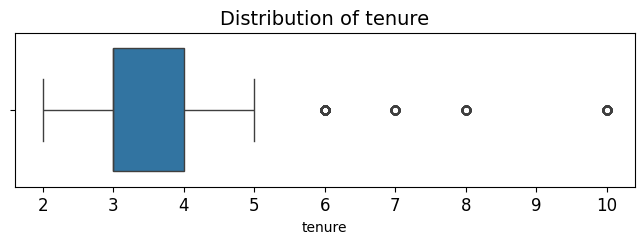

In [12]:
# Visualize distribution of `tenure` and outliers, if any
plt.figure(figsize=(8, 2))
sns.boxplot(data=df2, x='tenure')
plt.title('Distribution of tenure', fontsize=14)
plt.xticks(fontsize=12)
plt.show();

In [13]:
# Determine the number of rows containing outliers
q1 = df2['tenure'].quantile(0.25)
q3 = df2['tenure'].quantile(0.75) 
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

outliers = df2[(df2['tenure'] < lower) | (df2['tenure'] > upper)]
print("Number of outliers: {}".format(outliers.shape[0]))

Number of outliers: 824


**Observation:** Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

In [14]:
# Get numbers of people who left vs. stayed
df_left = df2['left'].value_counts()
print(df_left)
print('\n')
# Get percentages of people who left vs. stayed
print(df2['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Text(0.5, 1.0, 'Number of projects histogram')

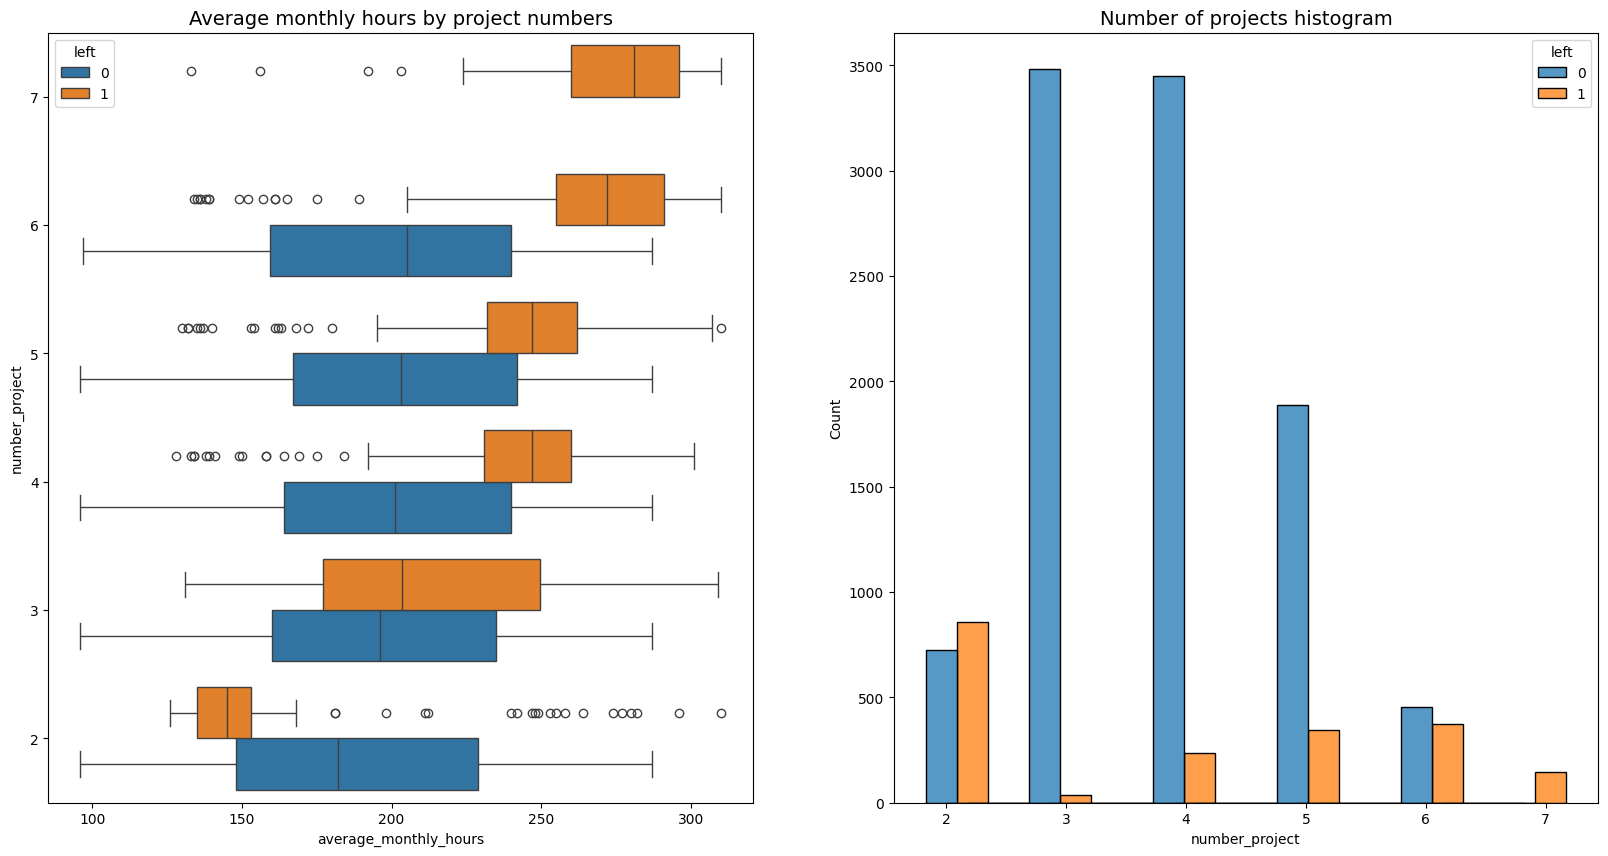

In [15]:
# Visualize distribution of average monthly hours and number of projects
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.boxplot(data=df2, x='average_monthly_hours', y='number_project', ax=ax[0], hue='left', orient='h')
ax[0].invert_yaxis()
ax[0].set_title('Average monthly hours by project numbers', fontsize=14)

sns.histplot(data=df2, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize=14)

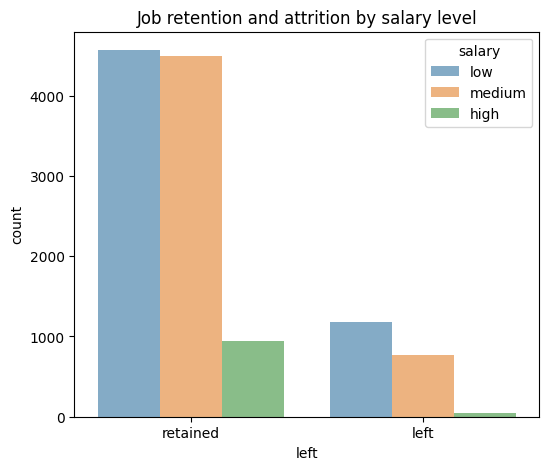

In [16]:
plt.figure(figsize=(6, 5))
ax=sns.countplot(data=df2, x='left', hue='salary', alpha=.6)
ax.set_xticklabels(['retained', 'left'])
plt.title('Job retention and attrition by salary level')
plt.show();

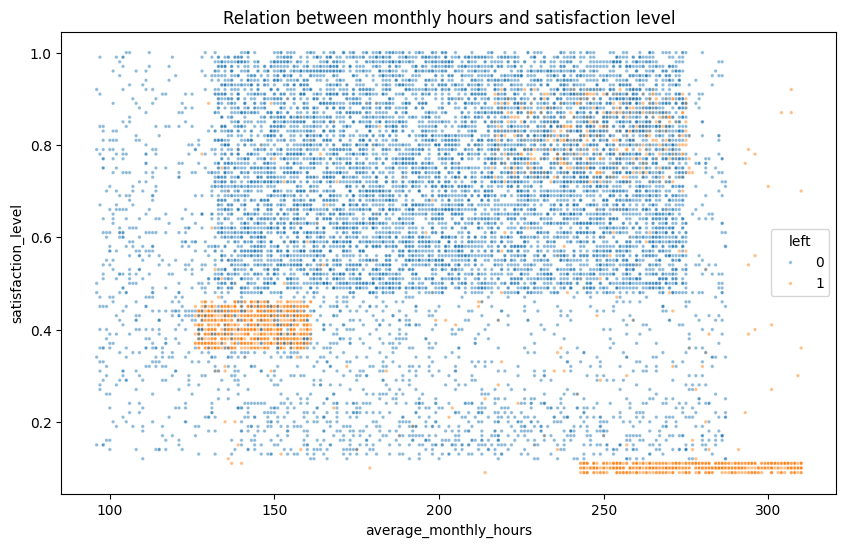

In [17]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='average_monthly_hours', y='satisfaction_level', marker='.', hue='left', alpha=.5, s=25)
plt.title('Relation between monthly hours and satisfaction level')
plt.show()

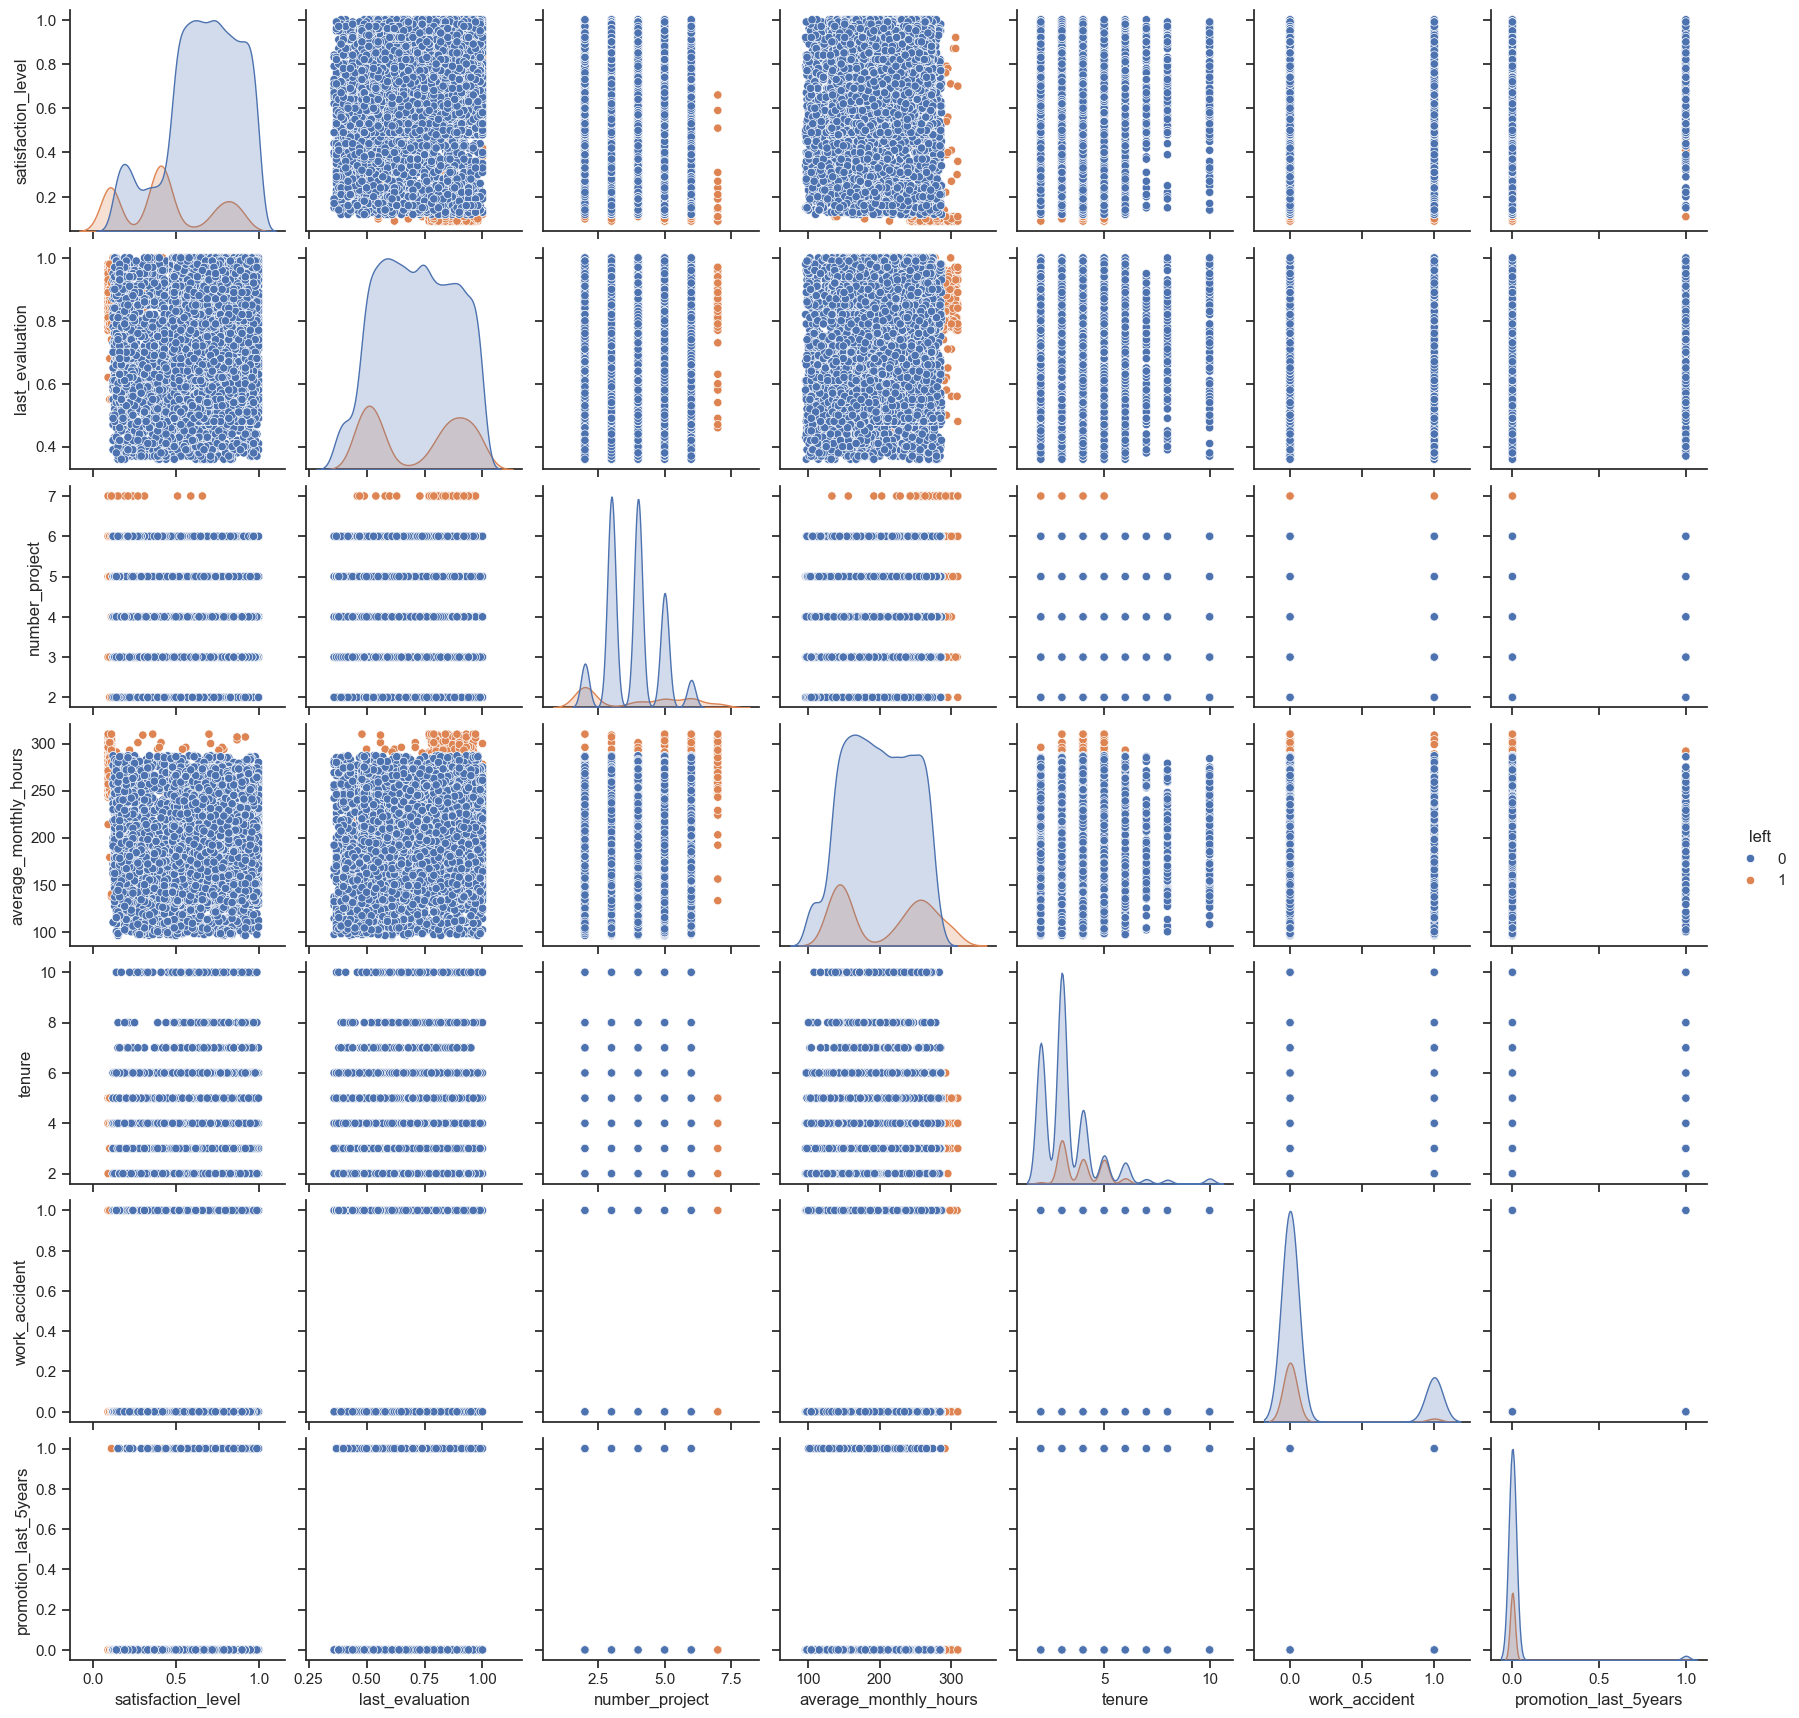

In [18]:
# Relation between different pairs of variables
sns.set_theme(style='ticks')
sns.pairplot(data=df2, hue='left')
plt.show();

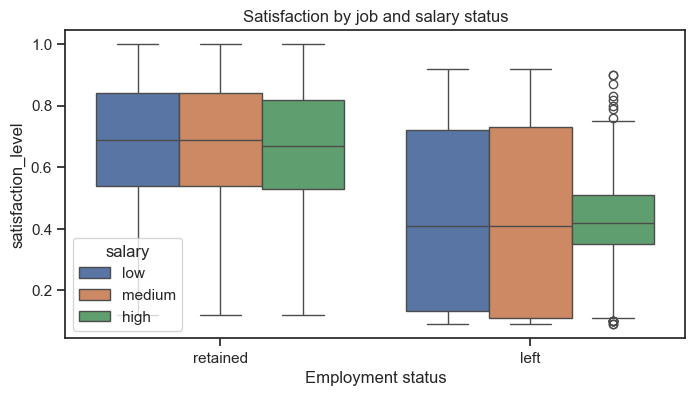

In [19]:
plt.figure(figsize=(8, 4))
ax = sns.boxplot(data=df2, y='satisfaction_level', x='left', hue='salary')
ax.set_xticklabels(['retained', 'left'])
plt.xlabel('Employment status')
plt.title('Satisfaction by job and salary status')
plt.show()

In [20]:
df_grouped = df2.groupby(['left'])[['average_monthly_hours', 'satisfaction_level', 'promotion_last_5years']].mean()
df_grouped

,average_monthly_hours,satisfaction_level,promotion_last_5years
left,,,
0,198.94270,0.667365,0.019500
1,208.16223,0.440271,0.004018


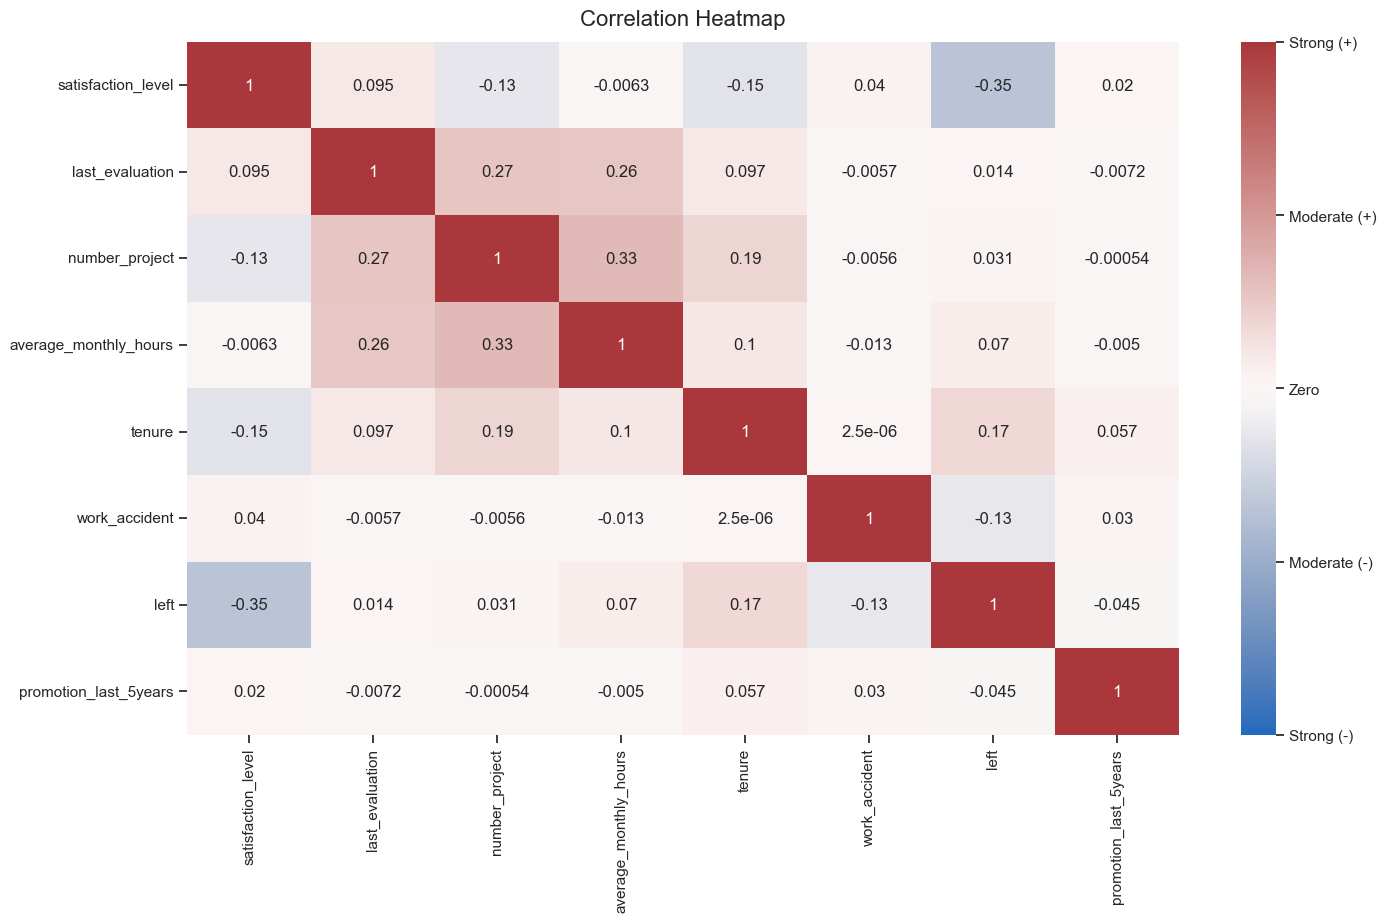

In [21]:
# Correlation between pairs of nurmeric variables
plt.figure(figsize=(16, 9))
heatmap =  sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
colorbar.set_ticklabels(['Strong (-)', 'Moderate (-)', 'Zero', 'Moderate (+)', 'Strong (+)'])
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=12)
plt.show()

## Step 2: Model Building

In [22]:
# Encode categorical variables
df_encode = df2.copy()
df_encode['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [23]:
# Encode 'salary' column as ordinal numeric categories
df_encode['salary'] = (df_encode['salary'].astype('category')
                       .cat.set_categories(['low', 'medium', 'high']).cat.codes)

In [24]:
# Dummy encode 'department' variable
df_encode = pd.get_dummies(df_encode, drop_first=False)
df_encode.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


## Choose model type

The target variable is binary in nature. Hence `logistic regression` technique appears to be a suitable choice. However, this technique is sensitive to outliers. Hence, the dataset could be filtered to avoid outliers on *tenure* variable.

In [25]:
df_logi = df_encode[(df_encode['tenure']>=lower) & (df_encode['tenure']<=upper)]
df_logi.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [26]:
df_logi.shape

(11167, 19)

In [27]:
# Split data between independent and target variables
y = df_logi['left']
X = df_logi.drop('left', axis=1)

In [28]:
# Split dataset between train and test sets
X_train_logi, X_test_logi, y_train_logi, y_test_logi = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [29]:
logi_model = LogisticRegression(random_state=42, max_iter=800)

In [30]:
logi_model.fit(X_train_logi, y_train_logi)

LogisticRegression(max_iter=800, random_state=42)

In [31]:
y_pred = logi_model.predict(X_test_logi)

In [32]:
cm_logi = confusion_matrix(y_test_logi, y_pred, labels=[1, 0])

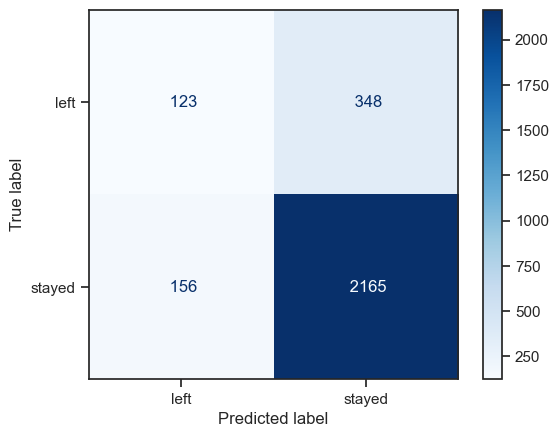

In [33]:
disp_logi = ConfusionMatrixDisplay(confusion_matrix=cm_logi, 
                                   display_labels=['left', 'stayed']
                                  )
disp_logi.plot(cmap=plt.cm.Blues, values_format=' ')
plt.show()

In [34]:
target_names = ['stayed', 'left']
print(classification_report(y_test_logi, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      stayed       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792



**Observation:** Though overall accuracy seems promising, performance metric with the minority class looks horrible. Hence, we can try with a couple of tree based methods to improve overall and class specific performance metrics. Again, we'll also tune hyperparameters to find an optimal combination if the best. 

### Tree-based techniques

In [35]:
y = df_encode['left']

In [36]:
X = df_encode.drop('left', axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

### Decision Tree Classifier

In [38]:
tree = DecisionTreeClassifier(random_state=42)

### K-fold Cross Validation to tune hyperparameters

In [39]:
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
            }

In [40]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [41]:
tree1_cv = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [42]:
%%time
tree1_cv.fit(X_train, y_train)

CPU times: total: 3.06 s
Wall time: 3.21 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [43]:
joblib.dump(tree1_cv, 'model_tree.pkl')

['model_tree.pkl']

In [44]:
tree_model = joblib.load('model_tree.pkl')

In [45]:
tree_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [46]:
tree_model.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [47]:
print(f'Best AUC Score: {round(tree_model.best_score_, 3)}')

Best AUC Score: 0.976


Best score for `roc_auc` looks very promising and way better than what was achieved by the logistic regression technique. Let's see the performance metric for all other parameters. First, we'll define a helper function compare the result in a single dataframe.

In [48]:
def get_cv_best_result(model_name:str, model_object:None, metric:str):
    '''Returns best result of a chosen metric and compare with other metric'''
    
    dict_metric = {'accuracy': 'mean_test_accuracy',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'auc': 'mean_test_roc_auc'
                  }
    df_results = pd.DataFrame(model_object.cv_results_)
    best_results = df_results.iloc[df_results[dict_metric[metric]].idxmax(),:]
    #evaluation parameters and their best scores are stored in a dictionary
    dict_best_result = {key:[round(best_results[val], 3)] for key, val in dict_metric.items()}
    dict_result = {'model': model_name}
    dict_result.update(dict_best_result)
    df_result= pd.DataFrame(dict_result, index=[1])
    return df_result

In [49]:
df_tree1 = get_cv_best_result('Decision Tree', tree_model, 'auc')
df_tree1

,model,accuracy,precision,recall,f1,auc
1,Decision Tree,0.981,0.967,0.918,0.942,0.976


#### Random Forest Model

In [50]:
rf = RandomForestClassifier(random_state=42)

In [51]:
cv_params_rf = {'max_depth': [2, 5, None],
                'n_estimators': [100, 200, 300, 400],
                'max_samples': [0.7, 1.0],
                'min_samples_leaf': [1, 3, 5]
               }

In [52]:
rf_cv = GridSearchCV(rf, cv_params_rf, scoring=scoring, cv=4, refit='roc_auc')

In [53]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 3min 17s
Wall time: 3min 20s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, None], 'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [54]:
pickle.dump(rf_cv, open('model_rf_cv.pkl', 'wb'))

In [55]:
rf_model = pickle.load(open('model_rf_cv.pkl', 'rb'))

In [56]:
rf_model.best_params_

{'max_depth': None,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'n_estimators': 300}

In [57]:
rf_model.best_score_

np.float64(0.9816965940751148)

In [58]:
df_rf_result = get_cv_best_result('Random Forest- CV', rf_model, 'auc')
df_rf_result

,model,accuracy,precision,recall,f1,auc
1,Random Forest- CV,0.98,0.977,0.902,0.938,0.982


In [59]:
def combine_results(df_result:list, sort_key=['f1']):
    '''combine two result dataframes and sort by the provided key'''
    df_multi = pd.concat(df_result)
    df_sorted = df_multi.sort_values(by=sort_key, ascending=False)
    df_sorted.index = range(1, len(df_multi)+1)
    return df_sorted

In [60]:
result_2 = combine_results([df_tree1, df_rf_result], 'auc')
result_2

,model,accuracy,precision,recall,f1,auc
1,Random Forest- CV,0.980,0.977,0.902,0.938,0.982
2,Decision Tree,0.981,0.967,0.918,0.942,0.976


**Observation:** In terms of `roc_auc` metric, Random Forest model slightly outperforms Decision Tree model, just over 1% to be precise. However, if we consider `f1 score`, Random Forest model be marginally behind Decision Tree. Let's now explore, how does the model perform with the separated `test set`. For this purpose, we'll write another helper function.

In [61]:
pred = rf_model.best_estimator_.predict(X_test)

In [62]:
def get_result_testdata(model_name:str, model_object, X_test_data, y_test_data):
    '''Returns prediction performance with the separated test data set i/o K-fold CV'''
    
    y_pred = model_object.best_estimator_.predict(X_test_data)
    
    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    auc = roc_auc_score(y_test_data, y_pred)
    
    dict_result = {'model':model_name, 
                   'accuracy': [round(accuracy, 3)],
                   'precision': [round(precision, 3)],
                   'recall': [round(recall, 3)],
                   'f1': [round(f1, 3)],
                   'auc': [round(auc, 3)]
                  }
    df_pred_result = pd.DataFrame(dict_result, index=[1])
    return df_pred_result

In [63]:
df_rf_pred = get_result_testdata('Random Forest - Test', rf_model, X_test, y_test)

result_3 = combine_results([result_2, df_rf_pred], 'f1')
result_3

,model,accuracy,precision,recall,f1,auc
1,Random Forest - Test,0.984,0.987,0.916,0.950,0.957
2,Decision Tree,0.981,0.967,0.918,0.942,0.976
3,Random Forest- CV,0.980,0.977,0.902,0.938,0.982


**Observation:** While `auc` metric drops with the separated test data, `f1 score` show better performance over both the previously trained models. Finally, we leverage ''Gradient Boosting Technique' and compare the results.

In [64]:
cv_params_gb = {'n_estimators': [50, 100, 200],
                'max_depth': [2, 5, None],
                'learning_rate': [0.01, 0.1, 0.2],
                'colsample_bytree': [0.5, 0.7],
                'subsample': [0.7, 1.0]
               }

In [65]:
gbc = XGBClassifier(random_state=42)

In [66]:
gbc_cv = GridSearchCV(gbc, cv_params_gb, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
%%time
gbc_cv.fit(X_train, y_train)

CPU times: total: 6min 36s
Wall time: 59.6 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 5, None],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1.0]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

## Step 3: Model Evaluation

In [68]:
pickle.dump(gbc_cv, open('model_gbc.pkl', 'wb'))

In [69]:
gbc_model= pickle.load(open('model_gbc.pkl', 'rb'))

In [70]:
df_gbc_cv = get_cv_best_result('Gradient Boosting - CV', gbc_model, 'auc')

In [71]:
df_gbc_test = get_result_testdata('Gradient Boosting - Test', gbc_model, X_test, y_test)

In [72]:
df_res_5 = combine_results([result_3, df_gbc_cv, df_gbc_test], ['f1', 'auc'])
df_res_5

,model,accuracy,precision,recall,f1,auc
1,Gradient Boosting - Test,0.985,0.981,0.928,0.954,0.962
2,Gradient Boosting - CV,0.984,0.979,0.922,0.950,0.987
3,Random Forest - Test,0.984,0.987,0.916,0.950,0.957
4,Decision Tree,0.981,0.967,0.918,0.942,0.976
5,Random Forest- CV,0.980,0.977,0.902,0.938,0.982


In [73]:
y_pred_gbc = gbc_model.best_estimator_.predict(X_test)

In [74]:
label_names = ['retained','left']
print(classification_report(y_test, y_pred_gbc, target_names=label_names))

              precision    recall  f1-score   support

    retained       0.99      1.00      0.99      2500
        left       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [75]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc, labels=[1, 0])
df_cm_gbc = pd.DataFrame(cm_gbc, columns=['left', 'retained'], index=['left', 'retained'])

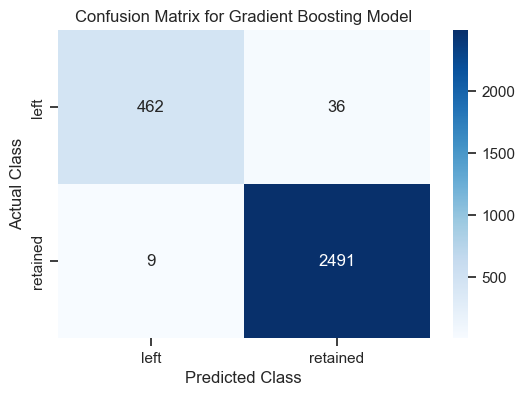

In [76]:
plt.figure(figsize=(6, 4))
ax = sns.heatmap(df_cm_gbc, annot=True, cmap='Blues', fmt='')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

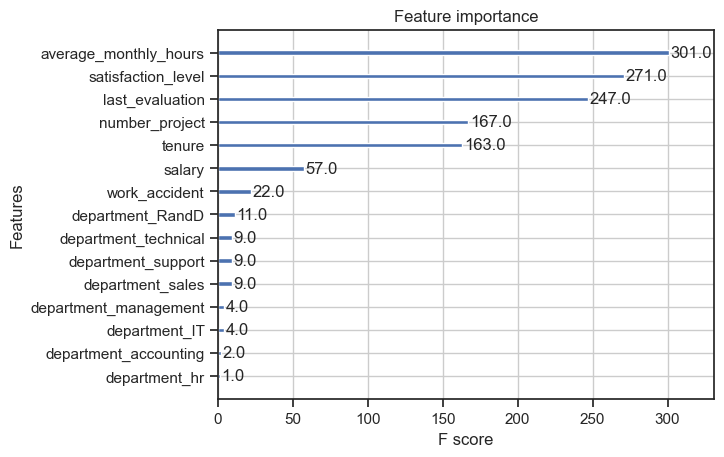

In [77]:
plot_importance(gbc_model.best_estimator_)
plt.show()

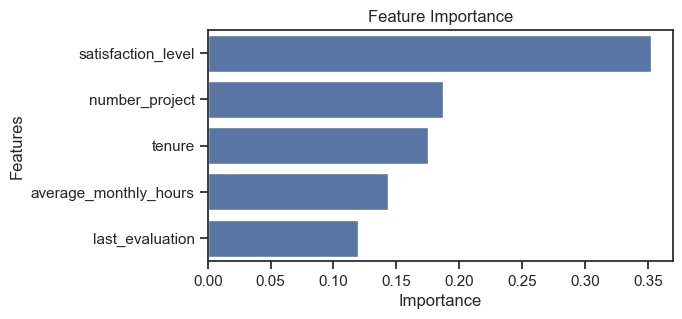

In [78]:
# Drop less important features
df_feature = pd.DataFrame(data=rf_model.best_estimator_.feature_importances_,
                          columns=['weight'],
                          index=X.columns
                         )
df_sorted = df_feature[df_feature['weight']>=0.05].sort_values(by='weight', ascending=False)
plt.figure(figsize=(6, 3))
sns.barplot(data=df_sorted, x='weight', y=df_sorted.index, orient='h')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Among the predictors, `average_monthly_hour` and `satisfaction_level` appears to be very important discriminators to partition the observations between the target classes. 

### ROC Curve

In [79]:
y_pred_proba_logi = logi_model.predict_proba(X_test_logi)[:,1]

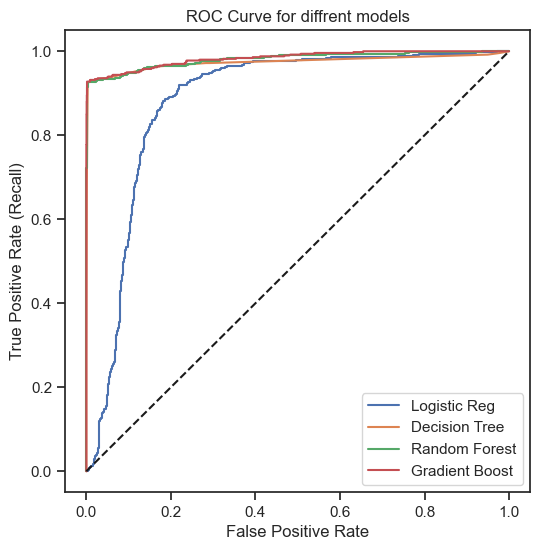

In [80]:
fpr, tpr, threshold = roc_curve(y_test_logi, y_pred_proba_logi)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Logistic Reg')
list_models = {'Decision Tree': tree1_cv, 'Random Forest': rf_model, 'Gradient Boost': gbc_model}
for key, val in list_models.items():
    y_pred_proba = val.predict_proba(X_test)[:,1]
    fpr, tpr, threshod = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=key)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for diffrent models')
plt.savefig('roc.png', bbox_inches='tight')
plt.show()

## Step 4: Analysis of Results and Recommendation

We've trained, tested and finetuned four different classification alogrithms. Apart from Logistic Regression, remaining three are tree-based algorithms and achieved very impressive results, though Logistic Regression is clearly behind others. Amonst tree-based methods, with over 95% F1 Score and AUC Score, Gradient Boosting outperforms other but only marginally. Finally, all the tree-based algorithms is recommended to deploy for distinguishing employees who might leave the the organization. 